In [1]:
# ! curl -O https://raw.githubusercontent.com/StanfordVL/taskonomy/master/taskbank/assets/test.png

In [7]:
from PIL import Image
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
import numpy as np

import torch
from visualprior.transforms import VisualPrior, representation_transform, multi_representation_transform

image = Image.open('test.png')
# image

im_256 = TF.resize(image, 256)
x = TF.to_tensor(im_256) * 2 - 1
x.unsqueeze_(0)
print(x.shape)
x.min(), x.max()

torch.Size([1, 3, 256, 256])


(tensor(-0.9686), tensor(1.))

Loading normal


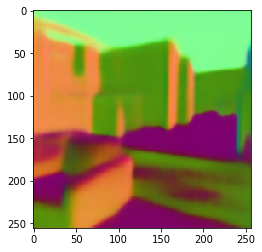

In [3]:
pred = VisualPrior.to_predicted_label(x)
pred = pred / 2. + 0.5
plt.imshow(np.rollaxis(pred[0].cpu().numpy(), 0, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


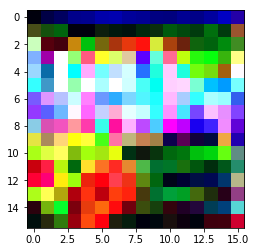

In [10]:
# pred = VisualPrior.to_representation(x)
# pred = representation_transform(x)
pred = multi_representation_transform(x)
pred = pred / 2. + 0.5
plt.imshow(np.rollaxis(pred[0][:3].cpu().numpy(), 0, 3))

In [8]:
net = TaskonomyNetwork(load_encoder_path='assets/networks/pytorch/normal_encoder.dat',
                       load_decoder_path='assets/networks/pytorch/normal_decoder.dat')

NameError: name 'TaskonomyNetwork' is not defined

torch.Size([1, 3, 256, 256])


(tensor(-0.9686), tensor(1.))

In [28]:
net(x).shape
pred = net(x) / 2. + 0.5
plt.imshow(np.rollaxis(pred[0].cpu().numpy(), 0, 3))

torch.Size([1, 3, 256, 256])

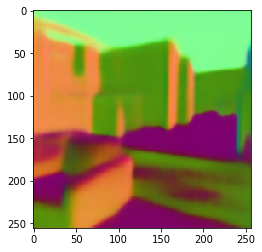

In [15]:
url = 'https://github.com/alexsax/visual-prior/raw/networks/assets/pytorch/normal_encoder-f5e2c7737e4948e3b2a822f584892c342eaabbe66661576ba50db7cdd40561c5.pth'

In [16]:
net = torch.utils.model_zoo.load_url(url, model_dir=None, map_location=None, progress=True)

SyntaxError: invalid syntax (transforms.py, line 73)